### importing libraries

In [2]:
import numpy as np 
import pandas as pd 
import  matplotlib.pyplot as plt 
import seaborn as sns 

### Load the dataset

In [4]:
df = pd.read_csv("diamonds.csv")
df.head(3)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31


#### We have this Unnamed: 0 column which is unnecessary, let's drop it

In [6]:
df = df.drop(df.columns[0], axis=1)

In [7]:
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


### Basic Understanding of the columns : 
1. carat : weight of the diamond - between 0.2--5.01
2. cut : quality of the cut (Fair, Good, Very Good, Premium, Ideal) --> Categorical column 
3. color : diamond colour, from J (worst) to D (best) -> Categorical, order : J,I,H,G,F,E,D 
4. clarity a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best)) 
5. depth total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)
6. table width of top of diamond relative to widest point (43--95) 
7. price - Target variable. 
8. x length in mm (0--10.74)
9. y width in mm (0--58.9)
10. z depth in mm (0--31.8)

### Basic Understanding of the data : 

In [10]:
print(f"No.of Rows : {df.shape[0]}, No.of Columns : {df.shape[1]}")
print(f"Basic Information of the dataset :\n {df.info()}")
print(f"Descriptive Statistics of the data :\n {df.describe()}")
print(f"No.of Null Values : {df.isnull().sum()}")
print(f"No.of Duplicates values : {df.duplicated().sum()}")

No.of Rows : 53940, No.of Columns : 10
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB
Basic Information of the dataset :
 None
Descriptive Statistics of the data :
               carat         depth         table         price             x  \
count  53940.000000  53940.000000  53940.000000  53940.000000  53940.000000   
mean       0.797940     61.749405     57.457184   3932.799722      5.731157   
std        0.47401

### We have duplicates in our dataset. Let's drop them 

In [12]:
# Dropping the duplicates : 
df = df.drop_duplicates()

In [13]:
# Validating : 
df.duplicated().sum()

0

In [14]:
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


### Encoding categorical columns 

In [16]:
#  (Fair, Good, Very Good, Premium, Ideal) -> order 
df['cut']=df['cut'].replace({
    'Fair':0,
    'Good':1,
    'Very Good':2, 
    'Premium':3, 
    'Ideal':4
})

C:\Users\SAMSUNG\AppData\Local\Temp\ipykernel_36516\2139544801.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cut']=df['cut'].replace({


In [17]:
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,4,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,3,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,1,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,3,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,1,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,4,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,1,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,2,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,3,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [18]:
df['color'].value_counts()

color
G    11262
E     9776
F     9520
H     8272
D     6755
I     5407
J     2802
Name: count, dtype: int64

In [19]:
# Categorical, order : J,I,H,G,F,E,D 
df['color'] = df['color'].replace({
    'J':0,
    'I':1, 
    'H':2, 
    'G':3, 
    'F':4,
    'E':5, 
    'D':6
})

C:\Users\SAMSUNG\AppData\Local\Temp\ipykernel_36516\1364968901.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['color'] = df['color'].replace({


In [20]:
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,4,5,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,3,5,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,1,5,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,3,1,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,1,0,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,4,6,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,1,6,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,2,6,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,3,2,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [21]:
df['clarity'].value_counts()

clarity
SI1     13032
VS2     12229
SI2      9150
VS1      8156
VVS2     5056
VVS1     3647
IF       1784
I1        740
Name: count, dtype: int64

In [22]:
### (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best)) 
df['clarity'] = df['clarity'].replace({
    'I1':0, 
    'SI2':1, 
    'SI1':2, 
    'VS2':3, 
    'VS1':4,
    'VVS2':5,
    'VVS1':6,
    'IF':7
})

C:\Users\SAMSUNG\AppData\Local\Temp\ipykernel_36516\4007270387.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['clarity'] = df['clarity'].replace({


In [23]:
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,4,5,1,61.5,55.0,326,3.95,3.98,2.43
1,0.21,3,5,2,59.8,61.0,326,3.89,3.84,2.31
2,0.23,1,5,4,56.9,65.0,327,4.05,4.07,2.31
3,0.29,3,1,3,62.4,58.0,334,4.20,4.23,2.63
4,0.31,1,0,1,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,4,6,2,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,1,6,2,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,2,6,2,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,3,2,1,61.0,58.0,2757,6.15,6.12,3.74


In [24]:
df = df.astype('float64')

In [25]:
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,4.0,5.0,1.0,61.5,55.0,326.0,3.95,3.98,2.43
1,0.21,3.0,5.0,2.0,59.8,61.0,326.0,3.89,3.84,2.31
2,0.23,1.0,5.0,4.0,56.9,65.0,327.0,4.05,4.07,2.31
3,0.29,3.0,1.0,3.0,62.4,58.0,334.0,4.20,4.23,2.63
4,0.31,1.0,0.0,1.0,63.3,58.0,335.0,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,4.0,6.0,2.0,60.8,57.0,2757.0,5.75,5.76,3.50
53936,0.72,1.0,6.0,2.0,63.1,55.0,2757.0,5.69,5.75,3.61
53937,0.70,2.0,6.0,2.0,62.8,60.0,2757.0,5.66,5.68,3.56
53938,0.86,3.0,2.0,1.0,61.0,58.0,2757.0,6.15,6.12,3.74


In [26]:
# Let's do some univariate anlysis : 
df.dtypes

carat      float64
cut        float64
color      float64
clarity    float64
depth      float64
table      float64
price      float64
x          float64
y          float64
z          float64
dtype: object

### Univariate analysis of numerical columns : 

In [28]:
num_columns = df.select_dtypes('float64').columns
num_columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')

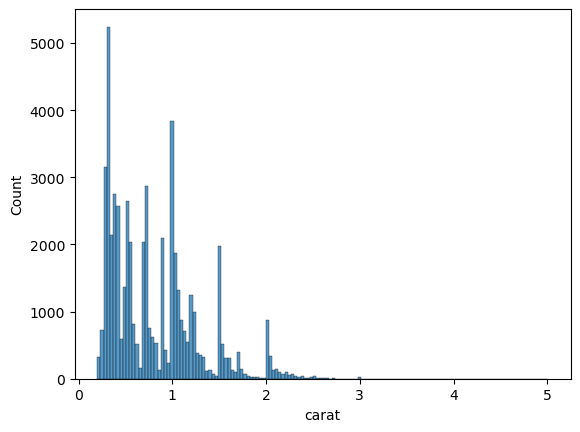

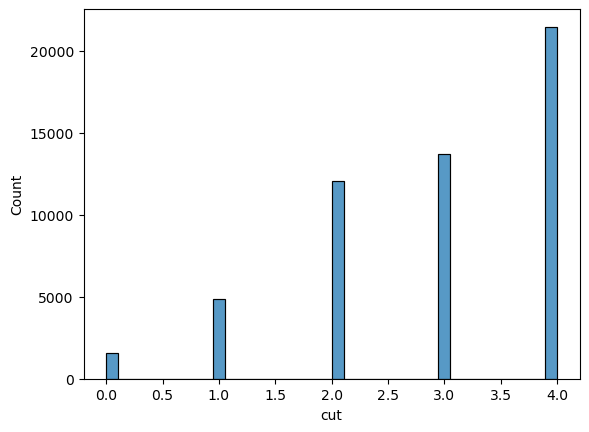

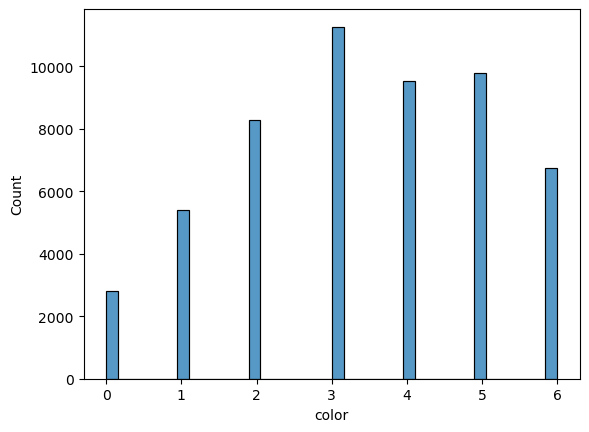

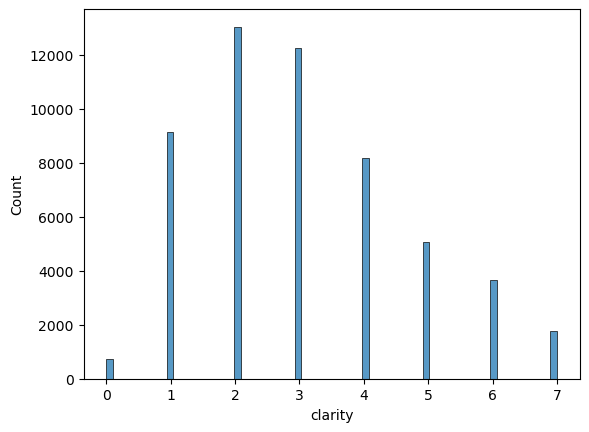

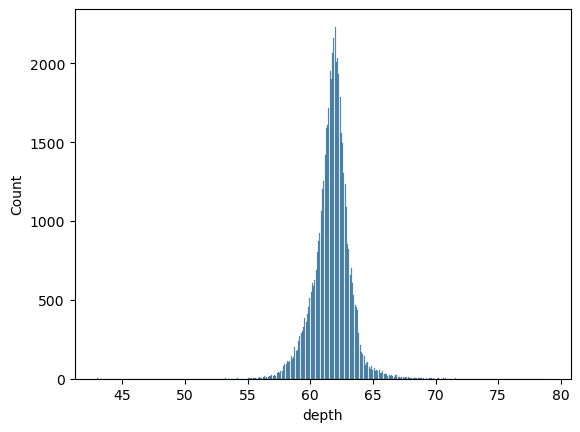

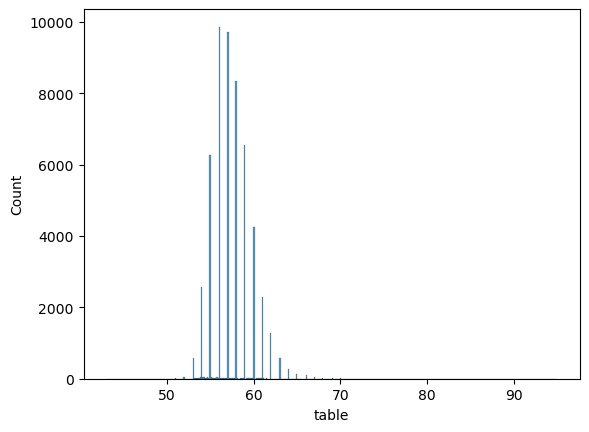

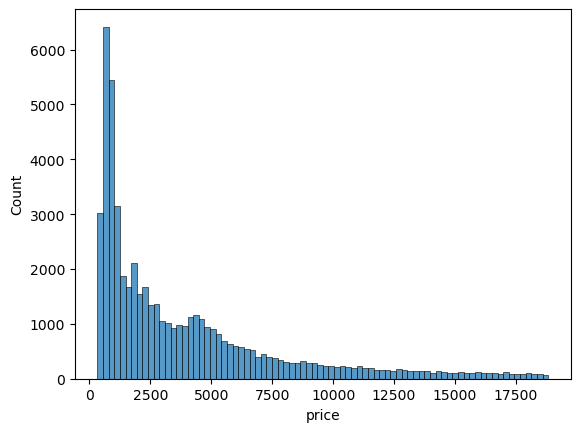

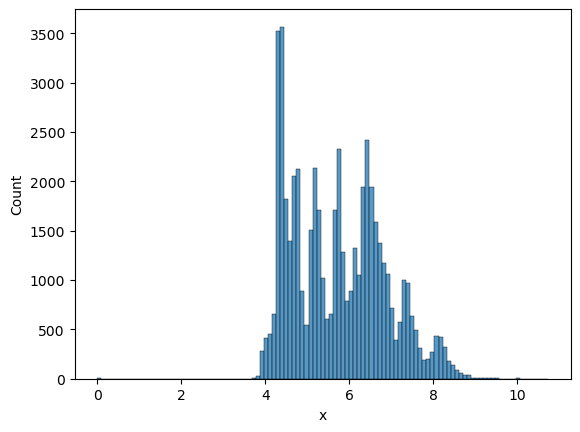

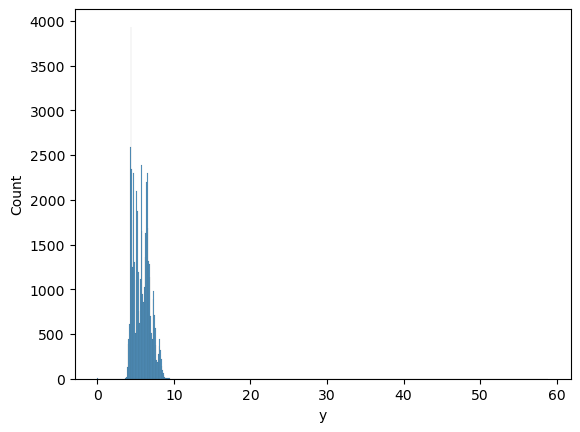

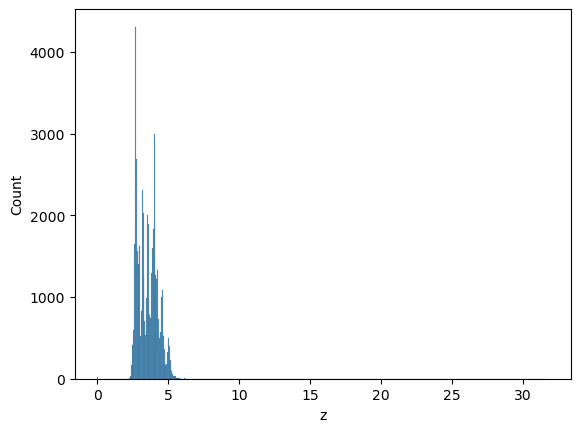

In [29]:
import warnings 
warnings.filterwarnings('ignore')
for col in num_columns:
    sns.histplot(df[col])
    plt.show()
    

In [30]:
# Let's get the skewness value 
for col in num_columns:
    print(f"{col} skewness = {df[col].skew()}")

carat skewness = 1.1136511411526497
cut skewness = -0.7158629703824294
color skewness = -0.1900059560716904
clarity skewness = 0.550679439387195
depth skewness = -0.11425026120643586
table skewness = 0.7922272870802959
price skewness = 1.618239898265432
x skewness = 0.37962390611337177
y skewness = 2.4457680214087554
z skewness = 1.5290234285039366


#### Our dataset have a lot of skewness, we have to either transform them or opt for model that can handle this. 

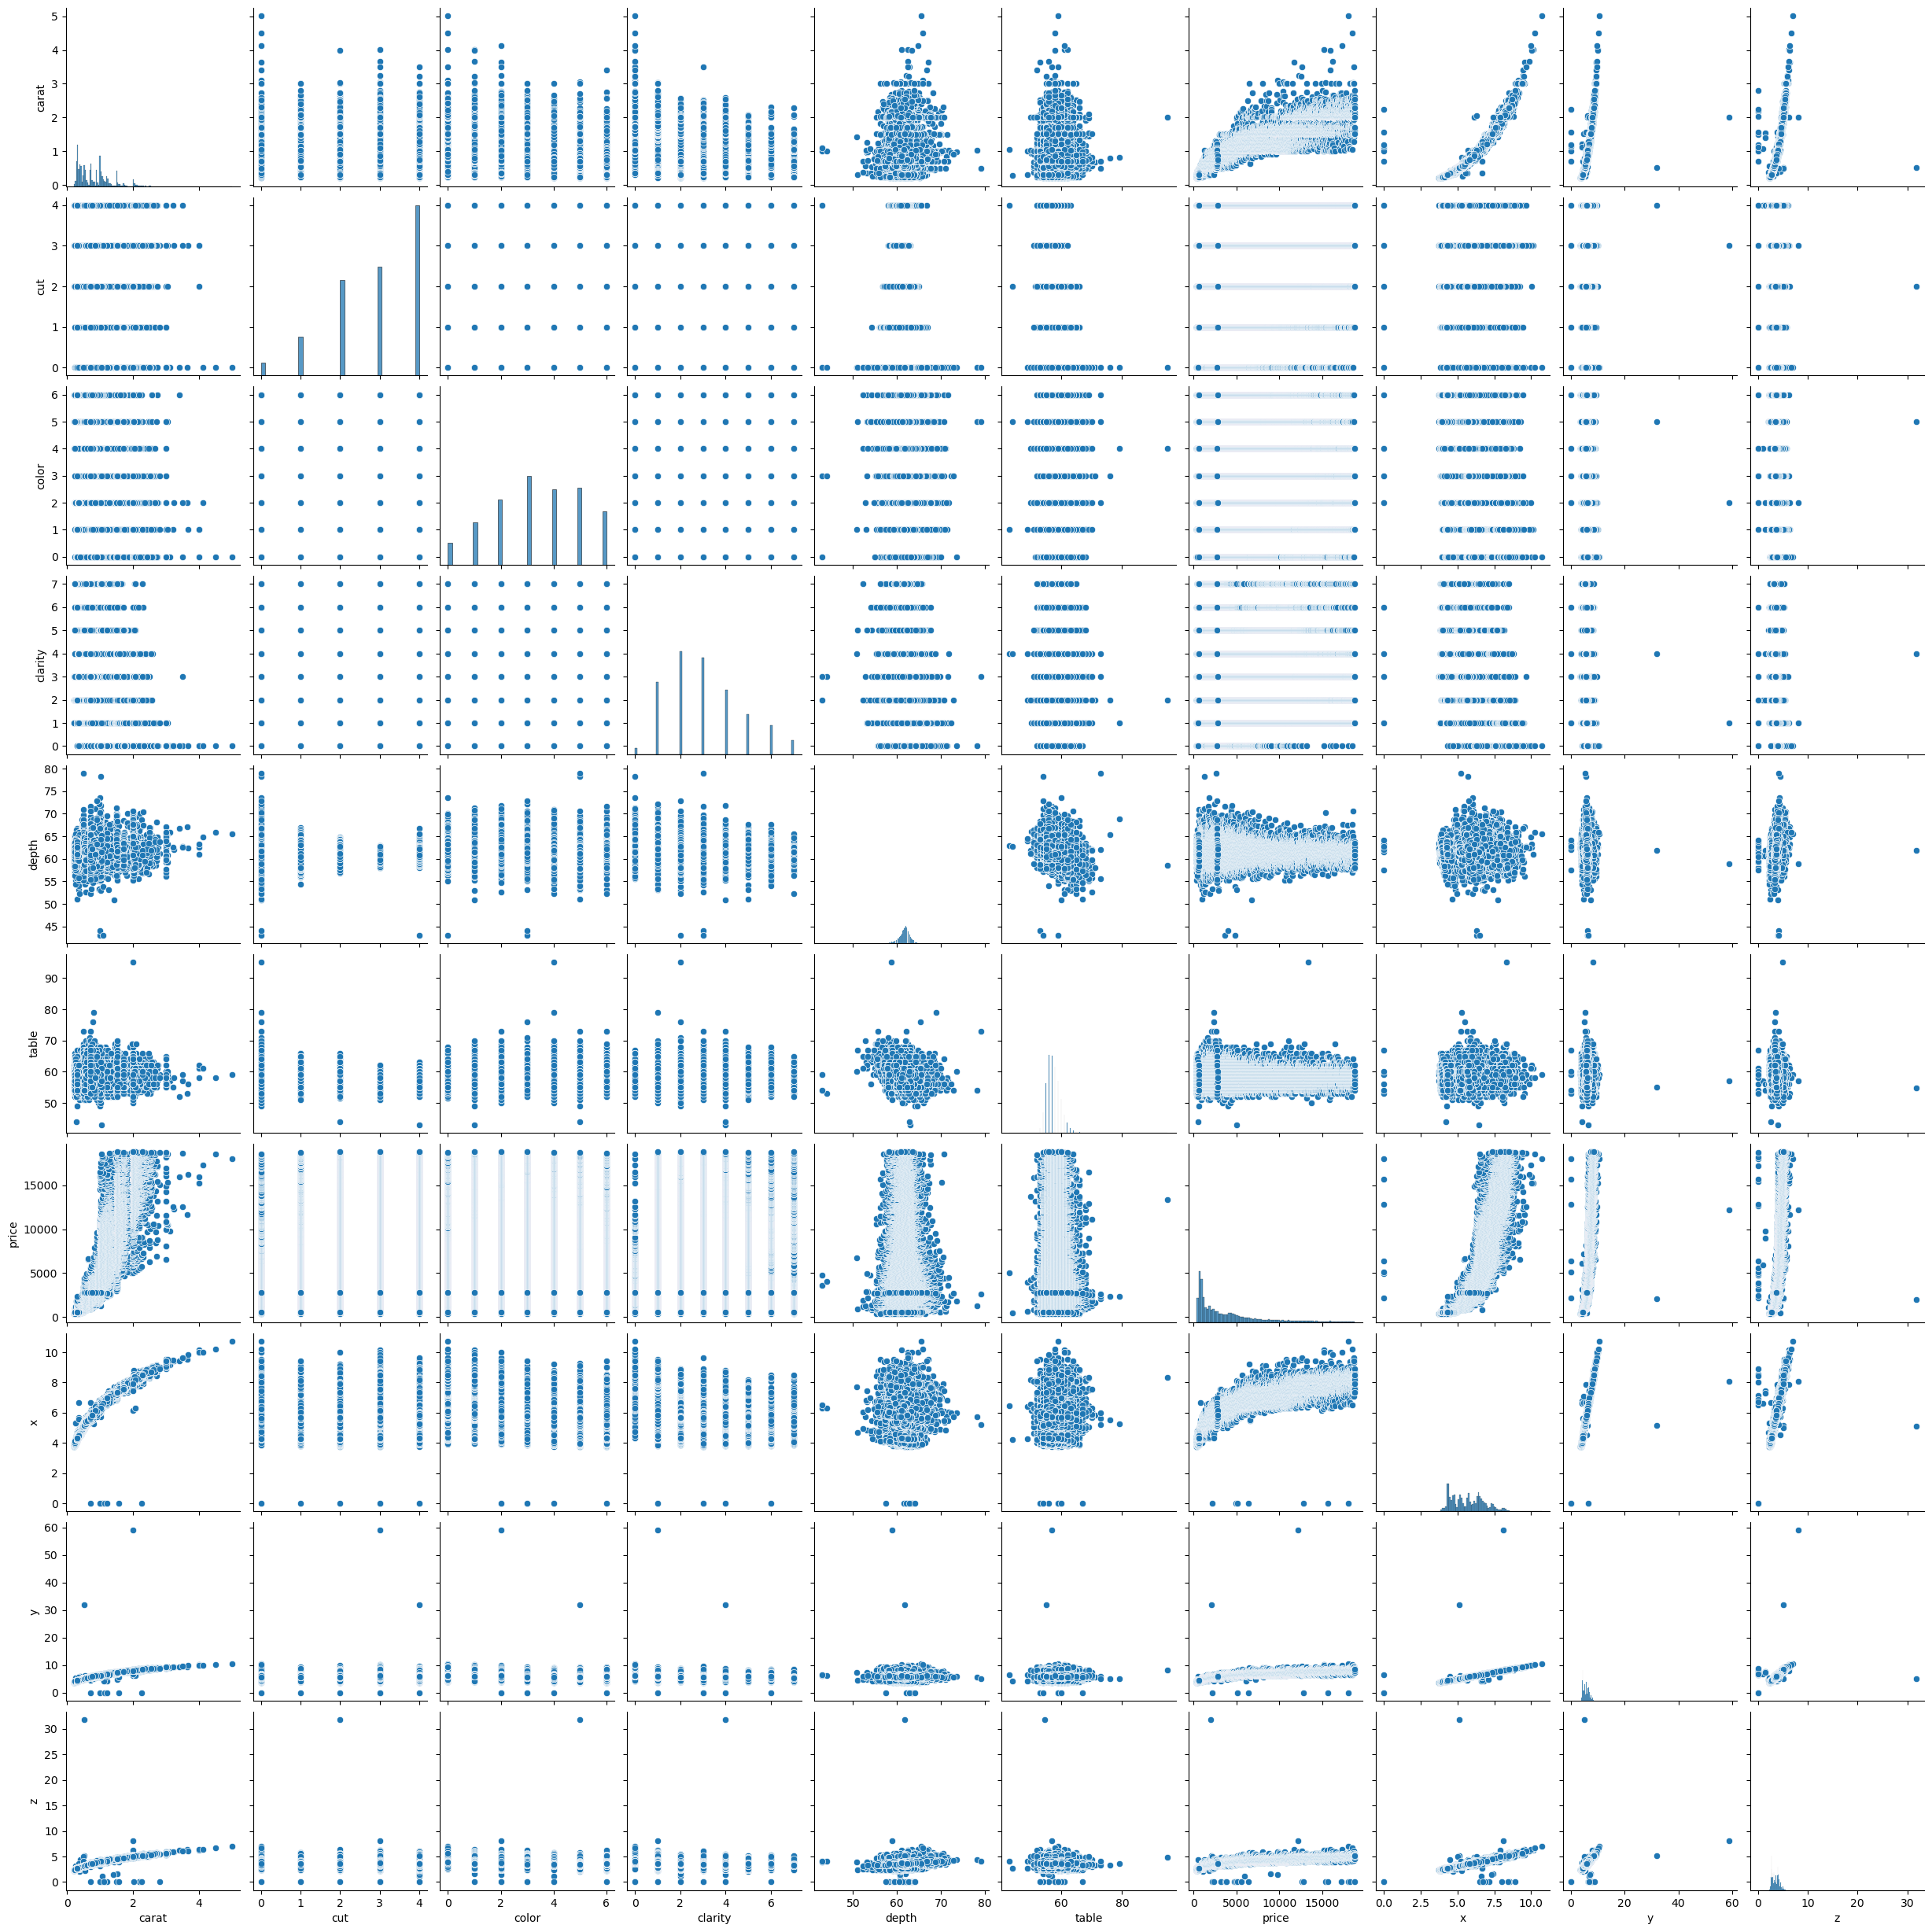

In [32]:
sns.pairplot(df)

In [33]:
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,4.0,5.0,1.0,61.5,55.0,326.0,3.95,3.98,2.43
1,0.21,3.0,5.0,2.0,59.8,61.0,326.0,3.89,3.84,2.31
2,0.23,1.0,5.0,4.0,56.9,65.0,327.0,4.05,4.07,2.31
3,0.29,3.0,1.0,3.0,62.4,58.0,334.0,4.20,4.23,2.63
4,0.31,1.0,0.0,1.0,63.3,58.0,335.0,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,4.0,6.0,2.0,60.8,57.0,2757.0,5.75,5.76,3.50
53936,0.72,1.0,6.0,2.0,63.1,55.0,2757.0,5.69,5.75,3.61
53937,0.70,2.0,6.0,2.0,62.8,60.0,2757.0,5.66,5.68,3.56
53938,0.86,3.0,2.0,1.0,61.0,58.0,2757.0,6.15,6.12,3.74


In [34]:
### Correlation : 
corr = df.corrwith(df['price'])

In [35]:
corr

carat      0.921548
cut       -0.052241
color     -0.171825
clarity   -0.146149
depth     -0.011048
table      0.126566
price      1.000000
x          0.884504
y          0.865395
z          0.861208
dtype: float64

### We will do model training without feature selection and later let's decide to do feature selction 

In [37]:
X = df.drop('price', axis=1)
y = df['price']

In [38]:
X

,carat,cut,color,clarity,depth,table,x,y,z
0,0.23,4.0,5.0,1.0,61.5,55.0,3.95,3.98,2.43
1,0.21,3.0,5.0,2.0,59.8,61.0,3.89,3.84,2.31
2,0.23,1.0,5.0,4.0,56.9,65.0,4.05,4.07,2.31
3,0.29,3.0,1.0,3.0,62.4,58.0,4.20,4.23,2.63
4,0.31,1.0,0.0,1.0,63.3,58.0,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...
53935,0.72,4.0,6.0,2.0,60.8,57.0,5.75,5.76,3.50
53936,0.72,1.0,6.0,2.0,63.1,55.0,5.69,5.75,3.61
53937,0.70,2.0,6.0,2.0,62.8,60.0,5.66,5.68,3.56
53938,0.86,3.0,2.0,1.0,61.0,58.0,6.15,6.12,3.74


In [39]:
y

0         326.0
1         326.0
2         327.0
3         334.0
4         335.0
          ...  
53935    2757.0
53936    2757.0
53937    2757.0
53938    2757.0
53939    2757.0
Name: price, Length: 53794, dtype: float64

### Splitting the data 

In [41]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Feature Scaling :

In [43]:
from sklearn.preprocessing import MinMaxScaler 
scaler = MinMaxScaler() 
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Model training : 

In [45]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
models = {
    'Linear Regression' : LinearRegression(),
    'Lasso': Lasso(),
    'Ridge': Ridge(), 
    'Elastic Net': ElasticNet()
}

In [46]:
for keys,model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    print(f"{keys}:\nMae = {mean_absolute_error(y_test, y_pred)}, Mse = {mean_squared_error(y_test, y_pred)}, r2 = {r2_score(y_test, y_pred)}")

Linear Regression:
Mae = 788.2775332090831, Mse = 1402687.796215697, r2 = 0.907972619460913
Lasso:
Mae = 806.4177447183463, Mse = 1418708.3578414996, r2 = 0.9069215442856922
Ridge:
Mae = 798.1980012593349, Mse = 1408997.1052461183, r2 = 0.9075586790355042
Elastic Net:
Mae = 2800.549804747531, Mse = 13817829.432449903, r2 = 0.09344142664179789


### Let's go with the Linear Regression. 

In [48]:
best_model = LinearRegression()
best_model.fit(X_train_scaled, y_train)
y_pred = best_model.predict(X_test_scaled)

In [49]:
print(f"Mae = {mean_absolute_error(y_test, y_pred)}, Mse = {mean_squared_error(y_test, y_pred)}, r2 = {r2_score(y_test, y_pred)}")

Mae = 788.2775332090831, Mse = 1402687.796215697, r2 = 0.907972619460913
